# **Gradient Descent**



In [ ]:
import pandas as pd
import numpy as np
from math import exp, log, floor
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df = df.drop(df[(df.label != 2) & (df.label != 7)].index)
df.loc[df['label'] == 2, 'label'] = -1
df.loc[df['label'] == 7, 'label'] = 1
df = df.set_index('label')
max = (df.max()).max()
df = df/max
Y = df.index
X = df.values
[n,L] = X.shape
Y_test = np.array(Y[0:floor(0.1*n)])
Y_train = np.array(Y[floor(0.1*n):])
X_test = X[0:floor(0.1*n),:]
X_train = X[floor(0.1*n):,:]

# **Train Data**
**eta1 = 0.1**

In [ ]:
## Train Data:
n_train = n - floor(0.1*n)
eta1 = 1
[b_train1, w_train1, J1] = J_list(n_train,L,eta1,X_train,Y_train)

**eta2 = 0.01**

In [ ]:
eta2 = 0.1
[b_train2, w_train2, J2] = J_list(n_train,L,eta2,X_train,Y_train)

**eta3 = 0.001**

In [ ]:
eta3 = 0.01
[b_train3, w_train3, J3] = J_list(n_train,L,eta3,X_train,Y_train)

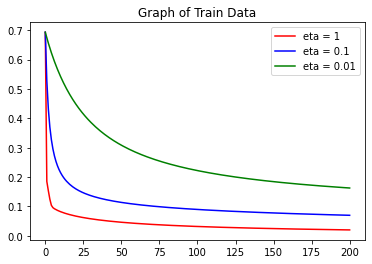

In [ ]:
itr = 200
Itr = list(range(itr+1))
plt.plot(Itr,J1,color = 'red')
plt.plot(Itr,J2,color = 'blue')
plt.plot(Itr,J3,color = 'green')
plt.legend(['eta = 1','eta = 0.1','eta = 0.01'])
plt.title("Graph of Train Data")
plt.show()

# **Test Data**
**eta1 = 0.1**

In [ ]:
n_test = n - n_train
## for eta1:
[b_test1, w_test1, J1] = J_list(n_test,L,eta1,X_test,Y_test)
## for eta2:
[b_test2, w_test2, J2] = J_list(n_test,L,eta2,X_test,Y_test)
## for eta3:
[b_test3, w_test3, J3] = J_list(n_test,L,eta3,X_test,Y_test)

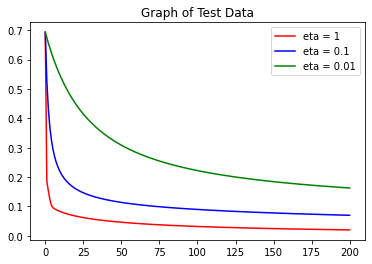

In [ ]:
itr = 200
Itr = list(range(itr+1))
plt.plot(Itr,J1,color = 'red')
plt.plot(Itr,J2,color = 'blue')
plt.plot(Itr,J3,color = 'green')
plt.legend(['eta = 1','eta = 0.1','eta = 0.01'])
plt.title("Graph of Test Data")
plt.show()

**Functions**

In [ ]:
def J_func(Y,X,b,w):
  n = len(Y)
  S = 0
  for i in range(n):
      yi = Y[i]
      xi = X[i,:]
      S += np.log(1 + np.exp(-yi*(b+np.dot(xi,w))))
  J = 1/n*S
  return(J)

def Gradw_J(Y,X,b,w):
  n = len(Y)
  S = 0
  for i in range(n):
    yi = Y[i]
    xi = X[i,:]
    mu = 1/(1 + np.exp(-yi*(b+np.dot(xi,w))))
    S -= yi*xi.T*(1-mu)
  grad_J = 1/n*S
  return(grad_J)

def Gradb_J(Y,X,b,w):
  n = len(Y)
  S = 0
  for i in range(n):
    yi = Y[i]
    xi = X[i,:]
    mu = 1/(1 + np.exp(-yi*(b+np.dot(xi,w))))
    S -= yi*(1-mu)
  grad_J = 1/n*S
  return(grad_J)

def J_list(n,L,eta,X,Y):
  b = 0
  w = np.zeros(L)
  j = J_func(Y,X,b,w)
  J = [j]

  itr = 200
  for k in range(itr):
      ## Updating w and b:    
      w = w - eta*Gradw_J(Y,X,b,w)
      b = b - eta*Gradb_J(Y,X,b,w)
      j = J_func(Y,X,b,w)
      J.append(j)
  return b,w,J

def Accuracy(X,Y,eta,b,w,Type):
  n = len(Y)
  valid = 0   ## For counting the number of correctly detected data
  for i in range(n):
    xi = X[i,:]
    yi = Y[i]
    sign = np.sign(b+np.dot(xi.T,w))
    if (sign == 1 & yi == 1) | (sign == -1 & yi == -1):
      valid += 1

  Accuracy = valid/n*100
  print("The accuracy of {} data for eta = {} is: {}".format(Type,eta,Accuracy))

# **Accuracy**
# **Train Data:**
**eta1 = 0.1**

In [ ]:
## for eta1:
Accuracy(X_train,Y_train,eta1,b_train1,w_train1,'train')
## for eta2:
Accuracy(X_train,Y_train,eta2,b_train2,w_train2,'train')
## for eta3:
Accuracy(X_train,Y_train,eta3,b_train3,w_train3,'train')

The accuracy of train data for eta = 1 is: 99.35241549022147
The accuracy of train data for eta = 0.1 is: 98.91205802357209
The accuracy of train data for eta = 0.01 is: 98.36808703535812


# **Test Data:**

In [ ]:
## for eta1:
Accuracy(X_test,Y_test,eta1,b_test1,w_test1,'test')
## for eta2:
Accuracy(X_test,Y_test,eta2,b_test2,w_test2,'test')
## for eta3:
Accuracy(X_test,Y_test,eta3,b_test3,w_test3,'test')

The accuracy of test data for eta = 1 is: 100.0
The accuracy of test data for eta = 0.1 is: 99.18319719953325
The accuracy of test data for eta = 0.01 is: 98.13302217036173


# **Stochastic Gradient Descent**
### **Updating with one sample**
**Train Data:**

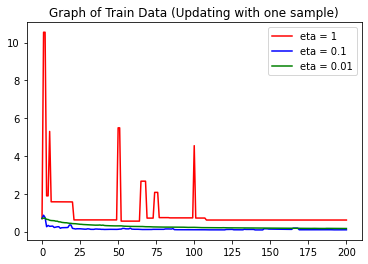

In [ ]:
## for eta1:
[b_train1, w_train1, J1] = J_list1(n_train,L,eta1,X_train,Y_train)
## for eta2:
[b_train2, w_train2, J2] = J_list1(n_train,L,eta2,X_train,Y_train)
## for eta3:
[b_train3, w_train3, J3] = J_list1(n_train,L,eta3,X_train,Y_train)

## Plotting:
itr = 200
Itr = list(range(itr+1))
plt.plot(Itr,J1,color = 'red')
plt.plot(Itr,J2,color = 'blue')
plt.plot(Itr,J3,color = 'green')
plt.legend(['eta = 1','eta = 0.1','eta = 0.01'])
plt.title("Graph of Train Data (Updating with one sample)")
plt.show()


**Train Data:**

In [ ]:
## for eta1:
Accuracy(X_train,Y_train,eta1,b_train1,w_train1,'train')
## for eta2:
Accuracy(X_train,Y_train,eta2,b_train2,w_train2,'train')
## for eta3:
Accuracy(X_train,Y_train,eta3,b_train3,w_train3,'train')

The accuracy of train data for eta = 1 is: 99.08042999611449
The accuracy of train data for eta = 0.1 is: 98.74368605102966
The accuracy of train data for eta = 0.01 is: 98.8084445020075



**Test Data:**

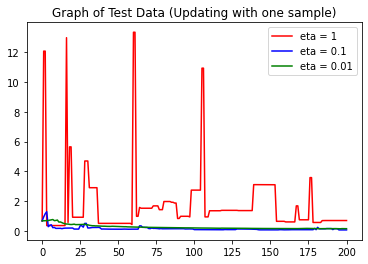

In [ ]:
## for eta1:
[b_test1, w_test1, J1] = J_list1(n_test,L,eta1,X_test,Y_test)
## for eta2:
[b_test2, w_test2, J2] = J_list1(n_test,L,eta2,X_test,Y_test)
## for eta3:
[b_test3, w_test3, J3] = J_list1(n_test,L,eta3,X_test,Y_test)

## Plotting:
itr = 200
Itr = list(range(itr+1))
plt.plot(Itr,J1,color = 'red')
plt.plot(Itr,J2,color = 'blue')
plt.plot(Itr,J3,color = 'green')
plt.legend(['eta = 1','eta = 0.1','eta = 0.01'])
plt.title("Graph of Test Data (Updating with one sample)")
plt.show()


**Test Data:**

In [ ]:
## for eta1:
Accuracy(X_test,Y_test,eta1,b_test1,w_test1,'test')
## for eta2:
Accuracy(X_test,Y_test,eta2,b_test2,w_test2,'test')
## for eta3:
Accuracy(X_test,Y_test,eta3,b_test3,w_test3,'test')

The accuracy of test data for eta = 1 is: 99.41656942823805
The accuracy of test data for eta = 0.1 is: 98.71645274212368
The accuracy of test data for eta = 0.01 is: 96.26604434072345


**Functions:**

In [ ]:
from random import randint
from random import sample

def J_func(Y,X,b,w):
  n = len(Y)
  S = 0
  for i in range(n):
      yi = Y[i]
      xi = X[i,:]
      S += np.log(1 + np.exp(-yi*(b+np.dot(xi,w))))
  J = 1/n*S
  return(J)

def J_func(Y,X,b,w):
  n = len(Y)
  S = 0
  for i in range(n):
      yi = Y[i]
      xi = X[i,:]
      S += np.log(1 + np.exp(-yi*(b+np.dot(xi,w))))
  J = 1/n*S
  return(J)

def Gradw_J1(Y,X,b,w):
  n = 1
  S = 0
  for i in range(n):
    yi = Y
    xi = X
    mu = 1/(1 + np.exp(-yi*(b+np.dot(xi,w))))
    S -= yi*xi.T*(1-mu)
  grad_J = 1/n*S
  return(grad_J)

def Gradb_J1(Y,X,b,w):
  n = 1
  S = 0
  for i in range(n):
    yi = Y
    xi = X
    mu = 1/(1 + np.exp(-yi*(b+np.dot(xi,w))))
    S -= yi*(1-mu)
  grad_J = 1/n*S
  return(grad_J)

def J_list1(n,L,eta,X,Y):
  b = 0
  w = np.zeros(L)
  j = J_func(Y,X,b,w)
  J = [j]

  itr = 200
  
  for k in range(itr):
    ind = randint(0,n-1)
    X1 = X[ind,:]
    Y1 = Y[ind]
    ## Updating w and b:    
    w = w - eta*Gradw_J1(Y1,X1,b,w)
    b = b - eta*Gradb_J1(Y1,X1,b,w)
    j = J_func(Y,X,b,w)
    J.append(j)
  return b,w,J

### **Updating with 100 samples**
**Train Data:**

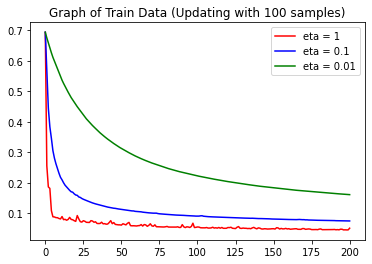

In [ ]:
## for eta1:
[b_train1, w_train1, J1] = J_list100(n_train,L,eta1,X_train,Y_train)
## for eta2:
[b_train2, w_train2, J2] = J_list100(n_train,L,eta2,X_train,Y_train)
## for eta3:
[b_train3, w_train3, J3] = J_list100(n_train,L,eta3,X_train,Y_train)

## Plotting:
itr = 200
Itr = list(range(itr+1))
plt.plot(Itr,J1,color = 'red')
plt.plot(Itr,J2,color = 'blue')
plt.plot(Itr,J3,color = 'green')
plt.legend(['eta = 1','eta = 0.1','eta = 0.01'])
plt.title("Graph of Train Data (Updating with 100 samples)")
plt.show()


**Train Data:**

In [ ]:
## for eta1:
Accuracy(X_train,Y_train,eta1,b_train1,w_train1,'train')
## for eta2:
Accuracy(X_train,Y_train,eta2,b_train2,w_train2,'train')
## for eta3:
Accuracy(X_train,Y_train,eta3,b_train3,w_train3,'train')

The accuracy of train data for eta = 1 is: 99.61144929413288
The accuracy of train data for eta = 0.1 is: 98.97681647454993
The accuracy of train data for eta = 0.01 is: 98.35513534516255



**Test Data:**

857


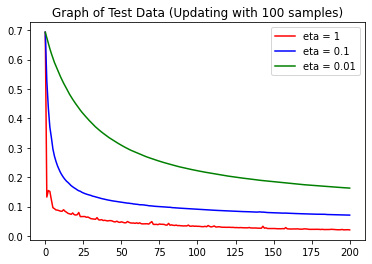

In [ ]:
## for eta1:
print(n_test)
[b_test1, w_test1, J1] = J_list100(n_test,L,eta1,X_test,Y_test)
## for eta2:
[b_test2, w_test2, J2] = J_list100(n_test,L,eta2,X_test,Y_test)
## for eta3:
[b_test3, w_test3, J3] = J_list100(n_test,L,eta3,X_test,Y_test)

## Plotting:
itr = 200
Itr = list(range(itr+1))
plt.plot(Itr,J1,color = 'red')
plt.plot(Itr,J2,color = 'blue')
plt.plot(Itr,J3,color = 'green')
plt.legend(['eta = 1','eta = 0.1','eta = 0.01'])
plt.title("Graph of Test Data (Updating with 100 samples)")
plt.show()


**Test Data:**

In [ ]:
## for eta1:
Accuracy(X_test,Y_test,eta1,b_test1,w_test1,'test')
## for eta2:
Accuracy(X_test,Y_test,eta2,b_test2,w_test2,'test')
## for eta3:
Accuracy(X_test,Y_test,eta3,b_test3,w_test3,'test')

The accuracy of test data for eta = 1 is: 99.88331388564761
The accuracy of test data for eta = 0.1 is: 98.94982497082847
The accuracy of test data for eta = 0.01 is: 98.01633605600934


**Functions:**

In [ ]:
from random import sample
def J_func(Y,X,b,w):
  n = len(Y)
  S = 0
  for i in range(n):
      yi = Y[i]
      xi = X[i,:]
      S += np.log(1 + np.exp(-yi*(b+np.dot(xi,w))))
  J = 1/n*S
  return(J)

def Gradw_J100(Y,X,b,w):
  n = len(Y)
  S = 0
  for i in range(n):
    yi = Y[i]
    xi = X[i,:]
    mu = 1/(1 + np.exp(-yi*(b+np.dot(xi,w))))
    S -= yi*xi.T*(1-mu)
  grad_J = 1/n*S
  return(grad_J)

def Gradb_J100(Y,X,b,w):
  n = len(Y)
  S = 0
  for i in range(n):
    yi = Y[i]
    xi = X[i,:]
    mu = 1/(1 + np.exp(-yi*(b+np.dot(xi,w))))
    S -= yi*(1-mu)
  grad_J = 1/n*S
  return(grad_J)

def J_list100(n,L,eta,X,Y):
  b = 0
  w = np.zeros(L)
  j = J_func(Y,X,b,w)
  J = [j]

  index_list = list(range(n-1))
  itr = 200
  for k in range(itr):
    
    ind = sample(index_list,100)
    X100 = X[ind,:]
    Y100 = Y[ind]
    ## Updating w and b:    
    w = w - eta*Gradw_J100(Y100,X100,b,w)
    b = b - eta*Gradb_J100(Y100,X100,b,w)
    j = J_func(Y,X,b,w)
    J.append(j)
  return b,w,J